<a href="https://colab.research.google.com/github/marismcguinness/DS3000FinalProject/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h2> DS 3000 - Fall 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h1>Anemia among Bolivian women</h1> </center>
<center><h4>Maris McGuinness</h4></center>
<center><h4>Samantha Roman</h4></center>
<center><h4>Togzhan Talgatkyzy</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Our project studies a dataset about Bolivian highland women. We predict anemia among women and if they will get treatment based on sociocultural factors such as age, education, location, and understanding of anemia. For this purpose we used supervised classification algorithms like k-Nearest Neighbor, Support Vector Machine, Gaussian Naive Bayes and Decision Tree, and cross-validation for training.
The results show that women from rural regions less likely to pursue health care options than women from more urban areas.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

### 1.1 Problem Statement

The project tackles the issue of anemia in women as a common illness that does not get enough attention. Anemia results from a lack of specific nutrients and vitamins and occurs when there is not enough consumption of animal products, nuts, fruits, vegetables, and beans. According to the report written by Camila Borda (2013), as a developing country Bolivia is facing negative changes in the eating behavior of people, they consume more "empty" calories and junk food. Therefore, there might be an increased prevalence of anemia here.
We want to identify to what extent the sociocultural environment affects the health of women and to what extent they are willing to treat the illness. This might help to have a better understanding of the importance of government and global organizations' aids to fight anemia.

### 1.2 Significance of the Problem

Anemia causes daily headaches, dizziness, weakness, vision problems, and bones and joints pain (Khatri, 2019). Women are a high-risk group, also, it is likely that the child of a woman with anemia will inherit the disorder. Therefore, anemia treatment is important to prevent future health issues of the entire population.
The report says that food issues of Bolivia are common for most of the Latin American countries. Therefore, it is important to study the health care issues in this developing countries, espacially when the disorder is also common for developed states like US. We believe that people's awareness will have significant role in preventing health problems.
The dataset we have used was analyzed to explore the social impact on anemia level. The research has found how gender roles, education and language affect getting healthcare service. 

### 1.3 Questions
Based on the presented problem, we aimed to answer some key questions on what factors determine anemia:
* How do the gender roles in family affect women's health?
* To what extent are Bolivian women aware of anemia?
* To what extent do women treat anemia as a serious disorder?
* How do reproductive status and age affect women's health?
* Would Gaussian Naive-Bayes give falsely accurate predictions if the variables we used are inter-dependent?


### 1.4 Hypothesis
The following hypothesis was developed as well:
* Women living in rural areas are less likely to seek anemia treatment pills compared to women from town areas.


## 2. METHOD

### 2.1. Data Acquisition

The project uses ready dataset prepared by Vitzthum Virginia from Indiana University website (https://scholarworks.iu.edu/dspace/handle/2022/21181). We used only the first CSV file, because the data from the second file does not seem consistent. The GitHub for the table is provided https://raw.githubusercontent.com/marismcguinness/DS3000FinalProject/master/phase1.csv. 

The table contains the IDs of research participants and their answers to multiple choice questions. The link to research had codebook where the answers to multiple choice questions are described.

### 2.2. Variables
The first predictive model used "Is anemic?" as a target variable in order to determine if the subject has anemia or not. The following ten features were used:
* Rural v. town
* Who is in charge of family health?
* Whose health is more important?
* What is anemia?
* How serious is anemia?
* For whom is anemia most serious?
* Age
* Reproductive status
* First language
* Education

The second predictive model used a target variable of "Sought pills from Health Center?" coupled with the following features:
* Rural v. town
* Hb prompting supplement recommendation
* Who is in charge of family health?
* Whose health is more important?
* What is anemia?
* How serious is anemia?
* For whom is anemia most serious?
* Age
* Reproductive Status
* First Language
* Education

Target Variable #2: "Sought pills from Health Center?"

### 2.3. Data Analysis

Supervised clasification was used to make predictions. We have predicted if woman might have anemia based on her social background such as education, age, gender roles and language. Also we predict if women will approach to health care service if they are from rural or urban region.
Machine learning algorithms like k-Nearest Neighbor, Support Vector Machine, Gaussian Naive Bayes and Decision Tree were used.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

Simple data cleaning was performed on the original dataset. For anemia predictions, all features that did not provide at least 165 values were removed. In particular, the "Was iron supplement recommended?" feature was removed as it would directly predict the subject's anemia status, and it did not qualify as a sociocultural factor of interest. Subject ID was taken to be the index.

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/marismcguinness/DS3000FinalProject/master/phase1.csv'

# reads the anemia dataset
df_all = pd.read_csv(url)

In [0]:
# cleans dataset for determining if subject is anemic
df_anemic = df_all.dropna(thresh=165, axis=1)
df_anemic = df_anemic.dropna(axis=0)
df_anemic = df_anemic.drop("Was iron supplement recommended?", axis=1)
df_anemic.set_index("ID", inplace=True)
df_anemic.head()

,Rural v. Town,Hb (1st Obs),Who is in charge of family health?,Whose health is more important?,What is anemia? (answer 1),How serious is anemia?,For whom is anemia most serious?,Age,Reproductive Status,First Language,Education
ID,,,,,,,,,,,
100443,0,12.5,2.0,3,2.0,1.0,4.0,24.0,2.0,1.0,5.0
101578,0,14.2,3.0,3,1.0,1.0,2.0,25.0,2.0,1.0,9.0
101935,1,17.6,2.0,3,1.0,2.0,2.0,29.0,2.0,1.0,0.0
102521,0,16.4,2.0,2,1.0,3.0,2.0,30.0,2.0,1.0,5.0
105161,0,14.7,3.0,3,2.0,1.0,4.0,30.0,4.0,1.0,7.0


Separate data cleaning steps were taken to prepare the dataset for pill predictions. The row threshold for features was 93 in this case, and the "Hb (1st Obs)" feature was removed as it was a replicate of the "Hb prompting supplement recommendation" feature.



In [0]:
# clean dataset for determining if pills were sought
df_pills = df_all.dropna(thresh=93, axis=1)
df_pills = df_pills.drop("Was iron supplement recommended?", axis=1)
df_pills = df_pills.drop("Hb (1st Obs)", axis=1)
df_pills = df_pills.dropna(axis=0)
df_pills.set_index("ID", inplace=True)
df_pills.head()

,Rural v. Town,Hb prompting supplement recommendation,Sought pills from Health Center?,Who is in charge of family health?,Whose health is more important?,What is anemia? (answer 1),How serious is anemia?,For whom is anemia most serious?,Age,Reproductive Status,First Language,Education
ID,,,,,,,,,,,,
100443,0,12.5,0,2.0,3,2.0,1.0,4.0,24.0,2.0,1.0,5.0
101578,0,14.2,0,3.0,3,1.0,1.0,2.0,25.0,2.0,1.0,9.0
105161,0,14.7,1,3.0,3,2.0,1.0,4.0,30.0,4.0,1.0,7.0
105949,1,15.4,0,3.0,3,2.0,1.0,2.0,25.0,4.0,1.0,6.0
106600,1,13.4,1,3.0,3,1.0,2.0,2.0,27.0,4.0,0.0,13.0





In order to determine if a subject was anemic or not, feature extraction was performed on the "Hb (1st Obs)" column. Based on literature reports, a hemoglobin level of 15.5 g/dL or lower qualified an individual as anemic [cite]. The code below shows how the `apply` method was used to extract anemic status based on reported hemoglobin level. Following this, the "Hb (1st Obs)" column was renamed as "Is anemic?" and used as the target column.

In [0]:
# defines the minimum hb level to qualify as not anemic (15.5 is anemic)
hb_min = 15.5

# processes hb level to determine if it qualifies for anemia (1) or not (0)
def is_anemic(hb_level):
  if hb_level > hb_min:
    return 0
  else:
    return 1

# determines if each subject in the df is anemic
df_anemic["Hb (1st Obs)"] = df_anemic["Hb (1st Obs)"].apply(is_anemic)
df_anemic = df_anemic.rename(columns={"Hb (1st Obs)":"Is anemic?"})



Data wrangling was used to extract the features and target values from the anemia prediction DataFrame. The same method were used for the pills prediction DataFrame, as shown in the code below.

In [0]:
# set features and target values for anemia prediction DataFrame
features = df_anemic.drop("Is anemic?", axis=1)
target = df_anemic["Is anemic?"]

# set features and target values for pills prediction DataFrame
features_pills = df_pills.drop("Sought pills from Health Center?", axis=1)
target_pills = df_pills["Sought pills from Health Center?"]



Preprocessing was performed after splitting the data in section 3.3.

 

Feature selection was performed in section 3.3 as well.

### 3.2. Data Exploration



The figures below explain the key variables in our data set: Geographic location *(Rural v. Town)*, Prevalence of Anemia *(Is anemic?)*, Education, Age, Severity of Anemia *(How serious is anemia?)*, and Who is Percieved as being most Affected by Anemia *(For whom is anemia the most serious?)*. It is important to note that all of the women represented in the data set were not pregnant at the time of data collection.

In [0]:
import plotly.express as px
import plotly.graph_objects as go

# determines if a value refers to anemic or not
def is_anemic_string(hb_level):
  if hb_level == 0:
    return "Not Anemic"
  else:
    return "Anemic"

# determines if each subject in the df is anemic
df_anemic_copy = df_anemic.copy()
df_anemic_copy["Is anemic?"] = df_anemic_copy["Is anemic?"].apply(is_anemic_string)

In [0]:
# creates Figure 1 (shown below)
location_values = df_anemic["Rural v. Town"].value_counts()
rural_count = location_values.get(0)
town_count = location_values.get(1)
text = ["Rural", "Town"]
colors = 	['rgb(205,92,92)','rgb((220,220,220)']
values = [rural_count, town_count]
fig = go.Figure(data=[go.Pie(text=text, values=values, pull=[0, 0.03], marker_colors=colors, showlegend=False)])
fig.update_layout(title={'text': 'Geographic Location of Bolivian Highland Women', 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

FIGURE 1:
This figure shows the geographical location of the Bolivian women represented in this dataset. The majority of the women studied (61%) are from rural areas of Bolivia. The other 39% of women are from towns or urban areas in Bolivia.
Image link: https://github.com/marismcguinness/DS3000FinalProject/blob/master/geographicLocationofWomen.png




In [0]:
# creates Figure 2 (shown below)
anemia_values = df_anemic["Is anemic?"].value_counts()
anemic_count = anemia_vaues.get(1)
not_anemic_count = anemia_values.get(0)
text = ["Anemic", "Not Anemic"]
colors = 	['rgb(205,92,92)','rgb((220,220,220)']
values = [anemic_count, not_anemic_count]
fig = go.Figure(data=[go.Pie(text=text, values=values, pull=[0, 0.03], marker_colors=colors, showlegend=False)])
fig.update_layout(title={'text': 'Proportion of Anemia in Bolivian Highland Women', 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

FIGURE 2: 
This figure shows the percentage of Bolivian women in the dataset that have Anemia. Nearly half of the women are anemic (49.3%). According to the World Health Organization, the global average for anemia in non-pregnant women is 30.2%.
Image link: https://github.com/marismcguinness/DS3000FinalProject/blob/master/anemiaProportionPieChartCentered.png

In [0]:
# creates Figure 3 (shown below)
colors =['rgb(205,92,92)','rgb(192,192,192)']
labels = ["Anemic", "Not Anemic"]
fig = px.histogram(df_anemic_copy, x="Education", color="Is anemic?", marginal="violin", color_discrete_sequence=colors)
fig.update_layout(title={'text': "Distribution of Education of Bolivian Highland Women With and Without Anemia", 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title="Years of Formal Schooling", yaxis_title="Number of Women", showlegend=False, plot_bgcolor='rgb(245,245,245)',
                  legend_orientation="h")
fig.show()

FIGURE 3:
This figure shows a stacked Histogram of the education distribution amongst Bolivian women. The red Histogram represents the distrubution amongst women with Anemia, while the gray Histogram represents the distrubution amongst women without Anemia. The distributions of both Histograms are very similar. Interestingly, the median years of education for women with anemia (5 years) is one year greater than the median years of education for women with anemia (4 years). This suggests that Anemic women in Bolivia are more educated than women without anemia, however, this is not conclusive evidence.
Image link: https://github.com/marismcguinness/DS3000FinalProject/blob/master/educationDistributionHistogram.png


In [0]:
# creates Figure 4 (shown below)
colors =['rgb(205,92,92)','rgb(192,192,192)']
labels = ["Anemic", "Not Anemic"]
fig = px.histogram(df_anemic_copy, x="Age", color="Is anemic?", marginal="violin", color_discrete_sequence=colors)
fig.update_layout(title={'text': "Distribution of Age of Bolivian Highland Women With and Without Anemia", 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title="Age", yaxis_title="Number of Women", showlegend=False, plot_bgcolor='rgb(245,245,245)',
                  legend_orientation="h")
fig.show()

FIGURE 4:
This figure shows a stacked Histogram of the age distribution amongst Bolivian women. The red Histogram represents the distrubution amongst women with Anemia, while the gray Histogram represents the distrubution amongst women without Anemia. The distributions of both Histograms are very similar, showing two peaks centered around the ages of 22-23 years and 34-35 years. Interesting, the age distribution of women with anemia is skewed very slightly more so to the right than the age distribution of women without anemia. According to the American Society of Hematology, the risk of anemia increases as women get older.
Image link: https://github.com/marismcguinness/DS3000FinalProject/blob/master/ageDistributionHistogram.png

In [0]:
# creates Figure 5 (shown below)
df_anemic_grouped = df_anemic_copy.groupby(["Is anemic?"]).mean()
df_anemic_grouped.reset_index(inplace=True)
colors =['rgb(205,92,92)','rgb(192,192,192)']
fig = px.bar(df_anemic_grouped, x='Is anemic?', y='How serious is anemia?', barmode="group", labels = {"Is anemic?": "", "How serious is anemia?": "How Serious is Anemia?"})
fig.update_layout(showlegend=False, plot_bgcolor='rgb(245,245,245)', 
                  title={'text': "How Serious Bolivian Highland Women Believe Anemia is on Average", 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_traces(marker_color=colors)
fig.show()

FIGURE 5:
This figure shows, on average, how serious women in the dataset perceive anemia to be on a scale from 0 (Not Serious) to 1 (Very Serious). This graph suggests that women without anemia understand the condition to be more serious than women with anemia. This could suggest that women without anemia are more cautious and may take steps to prevent this illness, however these results are not conclusive.
Image link:
https://github.com/marismcguinness/DS3000FinalProject/blob/master/howSeriousIsAnemiaBarGraph.png

In [0]:
# creates Figure 6 (shown below)
def is_serious_string(var):
  if var == 0:
    return "Don't Know"
  elif var == 1:
    return "Men"
  elif var == 2:
    return "Women"
  elif var == 3:
    return "Babies"
  elif var == 4:
    return "Everyone"
  elif var == 5:
    return "Men and Women"
  elif var == 6:
    return "Women and Babies"
df_anemic_copy2 = df_anemic.copy()
df_anemic_copy2["Is anemic?"] = df_anemic_copy2["Is anemic?"].apply(is_anemic_string)
df_anemic_copy2["For whom is anemia most serious?"] = df_anemic_copy2["For whom is anemia most serious?"].apply(is_serious_string)
df_anemic_copy2 = df_anemic_copy2.groupby(["Is anemic?", "For whom is anemia most serious?"]).count()
df_anemic_copy2["Count"] = df_anemic_copy2["Rural v. Town"]
df_anemic_copy2 = df_anemic_copy2[["Count"]]
colors =['rgb(205,92,92)','rgb(192,192,192)']
fig = px.bar(df_anemic_copy2.reset_index(), x="For whom is anemia most serious?", y="Count", color="Is anemic?",  color_discrete_sequence=colors)
fig.update_layout(showlegend=False, title={'text': "Who Bolivian Highland Women Believe Anemia Affects Most", 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title="", yaxis_title="Number of Women", plot_bgcolor='rgb(245,245,245)',
                  legend_orientation="h")
fig.show()

FIGURE 6:
This figure shows who women in the dataset to be most believe to be most affected by anemia. This graph shows that, overwhelmingly, the women in the dataset believe women to be most affected by anemia, followed by babies. According to the World Health Organization, women of child-bearing age are the most at risk for getting this condition.
Image link: https://github.com/marismcguinness/DS3000FinalProject/blob/master/whoAnemiaAffectsMostBarChart.png


### 3.3. Model Construction


For the hypothesis test we used Chi-Square test because it is more useful in exploring the relationships between variables (location of women and if they got health care). In order to make the data more readable, answer numbers should be changed to actual answers.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline

data = df_pills[['Rural v. Town', 'Sought pills from Health Center?']]
def location(answer):
  if answer == 1:
    return 'Town'
  else:
    return 'Rural'

data["Rural v. Town"] = data["Rural v. Town"].apply(location)

data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rural v. Town,Sought pills from Health Center?
ID,,
100443,Rural,0
101578,Rural,0
105161,Rural,1
105949,Town,0
106600,Town,1
...,...,...
194320,Town,1
194934,Town,1
195606,Rural,0


Next Contingency Table is needed to view frequency count. 

In [0]:
data['Rural v. Town'].value_counts()
data['Sought pills from Health Center?'].value_counts()
contingency_table = pd.crosstab(
    data['Rural v. Town'],
    data['Sought pills from Health Center?'],
    margins = True
)
contingency_table


Sought pills from Health Center?,0,1,2,All
Rural v. Town,,,,
Rural,27,13,0,40
Town,15,22,1,38
All,42,35,1,78


The visualization helps to understand Contingency Table. If there is no relationship between woman's location and her treatment, the ratio between Rural and Town women would be equal. As it is shown on chart, it is not equal thus our hypothesis might be accepted.

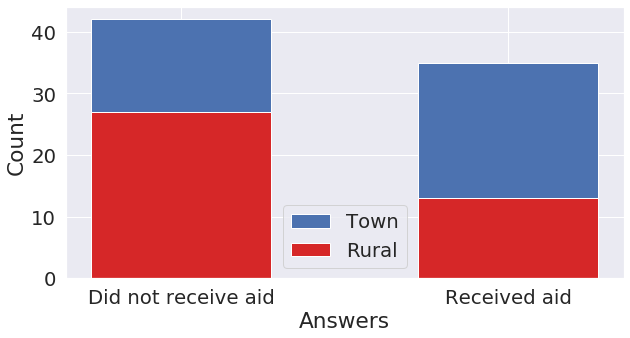

In [0]:
rcount = contingency_table.iloc[0][0:2].values
tcount = contingency_table.iloc[1][0:2].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['Did not receive aid', 'Received aid']
p1 = plt.bar(categories, rcount, 0.55, color='#d62728')
p2 = plt.bar(categories, tcount, 0.55, bottom=rcount)
plt.legend((p2[0], p1[0]), ('Town', 'Rural'))
plt.xlabel('Answers')
plt.ylabel('Count')
plt.show()

In order to check the hypothesis p-value is needed. Threfore, first Chi-Square statistic (X^2) needs to be calculated. It summarizes the difference between data and independence hypothesis.

X^2=(observed−expected)^2/(expected)

Observed are values that are found in Contingency Table, expected value are those when hypothesis is true. Thereofore, if hypothesis is 100% true the value of X^2 is 0.

Also, we need to calculate the Degree of Freedom using the values from table. 
DoF=(Number of rows−1)∗(Number of columns−1)


In [0]:
f_obs = np.append(contingency_table.iloc[0][0:3].values, 
                  contingency_table.iloc[1][0:3].values)
row_sums = contingency_table.iloc[0:2,3].values
col_sums = contingency_table.iloc[2,0:3].values
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))
f_obs = np.array([contingency_table.iloc[0][0:3].values,
                  contingency_table.iloc[1][0:3].values])
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

Chi-squared Statistic: 6.695977443609021
Degrees of Freedom: 2


(6.695977443609021, 0.03515498950716576, 2)

The p-value (0,035) is smaller than 0,05 that means there is a relationship between variables. Thus the null hypothesis is accepted.
Using the Degree of Freedom and Chi-squared distribution table (https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm) we can see that our X^2 is not very different from what it should be (5,991).

In conclusion, the location of woman will affect on her health care. Rural women are less likely to receive aid comparing to women from town.

Four classification machine learning algorithms were compared before moving forward with training for both predictive models. A dictionary containing classifier objects for k-Nearest Neighbor, Support Vector Machine, Gaussian Naive Bayes, and Decision Tree algorithms was created below.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# creates a dictionary of four classifier methods
estimators = {"k-Nearest Neighbor":KNeighborsClassifier(), 
              "Support Vector Machine":SVC(gamma="scale"),
              "Gaussian Naive Bayes":GaussianNB(), 
              "Decision Tree":DecisionTreeClassifier()}

The four algorithms in the `estimators` dictionary were then used within the `classifiers_cross_validation` method below. Here, mean accuracies and standard deviations for each model were generated. For both predictive models, less than 10 k-folds were used due to limited available data: n-splits of 5 for anemic prediction and 8 for pills prediction were used as they resulted in the highest mean accuracies.

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# fits these four classifiers to the data using cross-validation
# given specified features, target, and number of splits
def classifiers_cross_validation(feat, targ, splits):
    for classifier, method in estimators.items():
        kfold = KFold(n_splits=splits, random_state=3000, shuffle=True)
    
        scores = cross_val_score(estimator=method, X=feat, 
                                 y=targ, cv=kfold)
    
        print(classifier + ":\n\t", 
              f'mean accuracy={scores.mean():.2%}, ' + 
              f'standard deviation={scores.std():.2%}', "\n")

# uses 5-fold cross-validation on the anemic prediction DataFrame
# optimal splits value determined manually
print("------------------------\n" +
      "Anemia Predictive Model\n" +
      "------------------------")
classifiers_cross_validation(features, target, 5)

# uses 8-fold cross-validation on the pills prediction DataFrame
# optimal splits value determined manually
print("------------------------\n" +
      "Pills Predictive Model\n" +
      "------------------------")
classifiers_cross_validation(features_pills, target_pills, 8)

------------------------
Anemia Predictive Model
------------------------
k-Nearest Neighbor:
	 mean accuracy=44.21%, standard deviation=7.41% 

Support Vector Machine:
	 mean accuracy=46.35%, standard deviation=4.01% 

Gaussian Naive Bayes:
	 mean accuracy=55.95%, standard deviation=5.98% 

Decision Tree:
	 mean accuracy=49.89%, standard deviation=10.46% 

------------------------
Pills Predictive Model
------------------------
k-Nearest Neighbor:
	 mean accuracy=57.92%, standard deviation=10.92% 

Support Vector Machine:
	 mean accuracy=54.03%, standard deviation=7.74% 

Gaussian Naive Bayes:
	 mean accuracy=57.92%, standard deviation=13.23% 

Decision Tree:
	 mean accuracy=58.89%, standard deviation=7.72% 



Mean accuracies and standard deviations were used to evaluate model performance for both predictive sets. Upon one run of the model comparison code, the following results were achieved for anemia predictions:

*   k-Nearest Neighbors: 44.21% +/- 7.41%
*   Support Vector Machine: 46.35% +/- 4.01%
*   Gaussian Naive Bayes: 55.95% +/- 5.98%
*   Decision Tree: 50.66% +/- 8.64%

At first glance, these values seemed to indicate that Gaussian Naive Bayes returned the best results with the highest mean accuracy of 55.95%. This model, however, makes the naive assumption that all features are independent from one another. Making this assumption for this dataset would not be acceptable, as sociocultural features like education and living area tend to be related to one another. Thus, the Decision Tree was chosen as the optimal algorithm for anemia predictions with the next highest mean accuracy of 50.66%.

The following results were achieved for the pills predictions:

*   k-Nearest Neighbors: 57.92% +/- 10.92%
*   Support Vector Machine: 54.03% +/- 7.74%
*   Gaussian Naive Bayes: 57.92% +/- 13.23%
*   Decision Tree: 60.00% +/- 7.60%

In this case, the Decision Tree algorithm resulted in the the highest mean accuracy and lowest standard deviation. For these reasons,  Decision Tree classification was used on both the anemia and pills predictive models.





Although cross-validation was used to compare between machine learning algorithms, a percentage-split approach was used for further model training. The code below splits both the anemic and pills prediction datasets into training and testing sets.

In [0]:
# split anemic prediction data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    random_state=3000)

# split pills prediction data for training and testng
X_train_pills, X_test_pills, y_train_pills, y_test_pills = train_test_split(features_pills, 
                                                                            target_pills, 
                                                                            random_state=3000)

The features were scaled for both prediction sets so that all features would be weighted equally. This was especially important because features ranged from 0-1 in the case of "Rural v. town" or 12-17 in the case of hemoglobin level.

In [0]:
# NORMALIZE VARIABLES
from sklearn.preprocessing import MinMaxScaler

# scale for percentage-split model training on the anemia prediction DataFrame
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# scale for percentage-split model training on the pills prediction DataFrame
scaler_pills = MinMaxScaler()
scaler_pills.fit(X_train_pills)
X_train_scaled_pills = scaler_pills.transform(X_train_pills) 
X_test_scaled_pills = scaler_pills.transform(X_test_pills)

Recursive feature selection was coupled with a decision tree classifier to idenitify the most important features for each predictive model. Decision tree classification was used with four features on the anemia prediction set and two features on the pills prediction set. These optimal numbers of features were determined by manually adjusting the input and noting the highest accuracy results.

In [0]:
from sklearn.feature_selection import RFE
import numpy as np

# performs feature selection and classification given specified training
# and testing sets, features, and n features to select
def RFE_feature_selection(X_train, X_test, y_train, y_test, features, n):
  select = RFE(DecisionTreeClassifier(random_state = 3000), 
               n_features_to_select = n)
  select.fit(X_train, y_train)

  X_train_selected = select.transform(X_train)
  X_test_selected = select.transform(X_test)

  model = DecisionTreeClassifier().fit(X=X_train_selected, y=y_train)

  feature_names = np.array(features.columns)
  feature_names_selected = feature_names[select.get_support()]
  print("Selected features after RFE:")
  print("\t" + "\n\t".join(feature_names_selected))
   
  predicted = model.predict(X=X_test_selected)
  expected = y_test
        
  accuracy = model.score(X_test_selected, y_test)

  print("\nDecision tree classification performance with selected features:")
  print("\tPrediction accuracy on the test data:", f"{accuracy:.2%}\n")
    
  return X_train_selected, X_test_selected

# feature selection and classification on anemic prediction dataset
# optimal n features determined manually
print("------------------------\n" +
      "Anemia Predictive Model\n" +
      "------------------------")
X_train_selected, X_test_selected = RFE_feature_selection(X_train_scaled, 
                                                          X_test_scaled,
                                                          y_train,
                                                          y_test,
                                                          features,
                                                          4)

# feature selection and classification on pills prediction dataset
# optimal n features determined manually
print("------------------------\n" +
      "Pills Predictive Model\n" +
      "------------------------")
X_train_selected_pills, X_test_selected_pills = RFE_feature_selection(X_train_scaled_pills, 
                                                                      X_test_scaled_pills,
                                                                      y_train_pills,
                                                                      y_test_pills,
                                                                      features_pills,
                                                                      2)

------------------------
Anemia Predictive Model
------------------------
Selected features after RFE:
	How serious is anemia?
	For whom is anemia most serious?
	Age
	Education

Decision tree classification performance with selected features:
	Prediction accuracy on the test data: 58.82%

------------------------
Pills Predictive Model
------------------------
Selected features after RFE:
	Hb prompting supplement recommendation
	What is anemia? (answer 1)

Decision tree classification performance with selected features:
	Prediction accuracy on the test data: 65.00%



### 3.4. Model Evaluation

Predictive model performance was evaluated using prediction accuracy from the percentage-split training approach. After selecting four features for the anemia predictive model, the accuracy rose from 50.66% to 58.82%. In the pills predictive model with two features selected, the accuracy rose from 60.00% to 65.00%. These results show that recursive feature selection paired with Decision Tree classification successfully improved the accuracies of both models. It should be noted that final accuracy values are somewhat low, and this is attributed to the fact that limited data was available for predictive modeling.

The features selected in the previous section show that certain sociocultural factors aid in the prediction of anemia status. Education and age were identified as key attributes for predicting if a subject was anemic. This was then followed by the individual's perception of anemia, judged by how they answered the questions "For whom is anemia most serious?" and "How serious is anemia?" Based on these factors, anemia treatment policies and aid should focus on educating people in these regions on the severity of this condition. In section 3.2 *Data Exploration*, Figures 3-6 explain the relavance of these selected factors.

Similarly, certain features aid in predicting if a subject will even attempt to buy anemia treatment pills at a health center after being prescribed. Two features, Hb prompting supplement recommendation and the answer to "What is anemia?" were determined to have the most impact on predictions. Based on this, the actual severity of low hemoglobin can be used to predict if the individual would seek treatment. Additionally, if a subject was not educated on what anemia is, she was unlikely to seek the recommended treatment. This further supports the point that proper anemia awareness should be ensured before attempting to enforce treatment. 

### 3.5. Model Optimization


In an attempt to improve the prediction accuracies on test sets for both models, grid search hyperparameter tuning was performed. This was done in order to avoid over- or underfitting.

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split' : range(2, 50, 2),
              'max_depth': range(1, 20, 1)}

# performs grid search for decision tree classifier
def grid_search_DT(X_train_selected, X_test_selected, y_train, y_test):
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected, y=y_train)
    
    print("Best parameters: ", grid_search.best_params_)
    print("Best cross-validation score: ", grid_search.best_score_)

    train_score = grid_search.score(X_train_selected, y_train)
    test_score = grid_search.score(X_test_selected, y_test)

    return train_score, test_score

# tuning on anemia prediction dataset
print("------------------------\n" +
      "Anemia Predictive Model\n" +
      "------------------------")
train_score, test_score = grid_search_DT(X_train_selected, X_test_selected, 
                                         y_train, y_test)

# tuning on pills prediction dataset
print("\n------------------------\n" +
      "Pills Predictive Model\n" +
      "------------------------")
train_score_pills, test_score_pills = grid_search_DT(X_train_selected_pills, 
                                                     X_test_selected_pills, 
                                                     y_train_pills, 
                                                     y_test_pills)

------------------------
Anemia Predictive Model
------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best parameters:  {'max_depth': 2, 'min_samples_split': 32}
Best cross-validation score:  0.5882352941176471

------------------------
Pills Predictive Model
------------------------
Best parameters:  {'max_depth': 7, 'min_samples_split': 4}
Best cross-validation score:  0.6379310344827587


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 3.6. Model Testing

The tuned algorithms for both predictive models were used on the testing sets in the code portion above. The output is presented below.

In [0]:
# tuning on anemia prediction dataset
print("------------------------\n" +
      "Anemia Predictive Model\n" +
      "------------------------")
print("Training set score with best parameters: ", 
          train_score)
print("Test set score with best parameters: ", 
          test_score)

# tuning on pills prediction dataset
print("\n------------------------\n" +
      "Pills Predictive Model\n" +
      "------------------------")
print("Training set score with best parameters: ", 
          train_score_pills)
print("Test set score with best parameters: ", 
          test_score_pills)

------------------------
Anemia Predictive Model
------------------------
Training set score with best parameters:  0.6666666666666666
Test set score with best parameters:  0.5588235294117647

------------------------
Pills Predictive Model
------------------------
Training set score with best parameters:  0.7413793103448276
Test set score with best parameters:  0.55


Comparing the training set scores to the testing set scores in each case show that the models tend to overfit. For anemia prediction, the training set scored 66.67% accuracy with a testing set accuracy of 55.88%. The pills prediction showed a larger differnce with a training set score of 74.13% and testing set score of 55.00%. Since this second predictive model was performed on a smaller subset of the data, this supports the point that models have a stronger tendency to overfit when limited data is available, even after hyperparameter tuning.

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">


## 4. DISCUSSION
Several steps were taken to analyze the anemia dataset and make informed predictions from the analysis. After performing basic data cleaning to remove null values, an initial data analysis was performed. Grouping the data allowed for the performance of hypothesis tests and creation of visualizations. In order to create two predictive models—one for predicting anemia and the other for predicting if the subject will seek treatment—several supervised machine learning classification algorithms were compared. After identifying decision tree classification as the highest-performing algorithm for both models, further model optimization was performed. This included training and testing, recursive feature selection, and grid search for hyperparameter tuning. Using the combined results from descriptive statistics, data visualization, and machine learning, several conclusions were made about which anemia treatment policies could be most effective.

The Chi-Square Test is used to test hypothesis because it determines if variables are related to each other. In this case, p value (0,035) is smaller than 0,05 that means that there is a relationship between the location of participant and her treatment. Thus our null hypothesis is supported. Also, we have calculated Chi-Square statistic value (X^2) of 6,69 that summarizes the difference between data and independence hypothesis. The value is not large therefore we may assume that hypothesis is accepted.

In constructing the machine learning classification models, four algorithms were compared using cross-validation: k-Nearest Neighbors, Support Vector Machine, Gaussian Naïve Bayes, and Decision Tree. For the anemia predictive model, Gaussian Naïve Bayes appeared to perform the best with a high mean accuracy. However, the naïve assumption that all features were independent would not work with this dataset—several sociocultural factors were likely related. Thus, the Decision Tree classifier was chosen as the next highest-performing algorithm. In the case of the pills-sought predictive model, the Decision Tree classifier had the highest mean accuracy and was chosen for the model’s algorithm.

Additional conclusions could be made about the dataset after performing feature selection and hyperparameter tuning. Throughout all model optimization, prediction accuracies ranging from 50% to 70% were achieved, indicating that the available features provide some level of insightful predictions, but more data is required to develop robust predictive models. In predicting anemia, four key features were selected: years of education, age, answer to “For whom is anemia most serious?” and “How serious is anemia?” For predicting if the subject would seek pills, two features were selected: hemoglobin level and the answer to "What is anemia?" In both models, these features indicate that individual perception on the severity of anemia aids in predicting if an individual will have anemia and if they will attempt to seek a prescribed treatment. Based on this, it is recommended that policies on anemia treatment should first focus on educating at-risk women on anemia before attempting to enforce a treatment that ultimately will not be sought.

Several improvements could be made in future works related to the topic of anemia prediction in at-risk regions. A key improvement would be to obtain more data as this would potentially improve the prediction accuracy of the models and allow additional sociocultural features to be explored. It would also be useful to perform an analysis on the hemoglobin level of an individual at the beginning and end of the study to determine effectiveness of the prescribed treatment. This lack of available data has proven to be an issue in other studies, especially in those focused on developing countries, but more datasets are likely to become available over time as awareness on the issue is increased.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
We have divided the tasks in the group. All of us did some reaserch and trials with different datasets, after we discussed what we have and came to one decision. Samantha did the coding part of analysis, Maris also did some part of coding and also made the visualizations. Togzhan did the hypothesis test and introduction part of report.

Resources
    Borda, C. (2013). Bolivia’s Nutritional Status . Bolivia’s Nutritional Status . Retrieved from https://oxfamibis.dk/sites/default/files/PDF/global/Bolivia pdf files/ibis_report_bolivias_nutritional_status_2013.pdf
    Khatri, M. (2019, October 12). Anemia: Causes, Symptoms, Diagnosis, Treatments. Retrieved December 8, 2019, from https://www.webmd.com/a-to-z-guides/understanding-anemia-basics#1.
    